### Exercies from the fourth Reivew Exercise, concerning NumPy

These exercises range from dead simple to rather complex. Each has code examples to get you going
(often they include a complete solution, but the idea is for you to experiement)

Begin a new Jupyter notebook (or a new Python module if you prefer) and write your code in that

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Compute the mean standard deviation and variance of a given array

In [5]:
x = np.arange(6)
m = np.mean(x) # compare with np.average(x)
s = np.std(x)
r= np.var(x)
m,s,r

(2.5, 1.707825127659933, 2.9166666666666665)

Compute cross-correlation of two given arrays (use np.cov)

In [6]:
x = np.array([0, 1, 3])
y = np.array([2, 4, 5])
np.cov(x, y)

array([[2.33333333, 2.16666667],
       [2.16666667, 2.33333333]])

Count the number of occurrences of each value in a given array of non-negative integers

(use np.bincount)

In [7]:
array1 = [0, 1, 6, 1, 4, 1, 2, 2, 7]
np.bincount(array1)

array([1, 3, 2, 0, 1, 0, 1, 1], dtype=int64)

Compute and display the histogram of numbers against a set of 'bins'

(explore with more complex data than shown here)

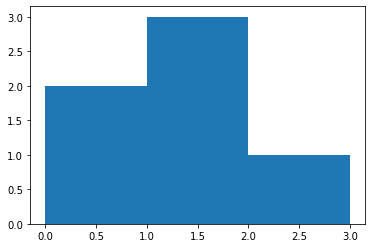

In [11]:
nums = np.array([0.5, 0.7, 1.0, 1.2, 1.3, 2.1])
bins = np.array([0, 1, 2, 3])
plt.hist(nums, bins=bins)
plt.show()

Create a 3×6 numpy array of boolean 'True' values, then transpose it

In [27]:
t1 = np.arange(18)
t2 = t1.reshape(3,6)
t3 = t2!=99
t3

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

Create an array of the integers 1 to 1000, then populate another array from the even numbers that
exist in the first array. 

In [58]:
arr = np.arange(1000)
evens = arr[2:999:2]
evens

Populate another array with just the primes from the first array. Time this
operation and aim for very large sets of data

In [59]:
import math
# with thanks to https://rebrained.com/?p=458
def prime(upto=100000):
    primes=[2]
    for num in range(3,upto+1,2):
        isprime=True
        for factor in range(3,1+int(math.sqrt(num)),2):
             if not num % factor: isprime=False; break
        if isprime: primes.append(num)
    return primes

%time prime(1000000) # 1.75 sec on my machine

Make an array that contains the positions where elements of a and b match

In [31]:
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
matching = np.where(a == b)
matching

(array([1, 3, 5, 7], dtype=int64),)

Use zip to combine all the following Irish places with their country or origin (ie)
(You don't need numpy but you could generate a numpy array of the results)

In [44]:
cities = ["Dublin","Cork","Limerick","Galway","Waterford","Drogheda","Kilkenny","Wexford","Sligo","Clonmel","Dundalk","Bray","Ennis","Tralee","Carlow","Naas","Athlone","Letterkenny","Tullamore","Killarney","Arklow","Cobh","Castlebar","Midleton","Mallow","Ballina","Enniscorthy","Wicklow","Cavan","Athenry","Longford","Dungarvan","Nenagh","Trim","Thurles","Youghal","Monaghan","Buncrana","Ballinasloe","Fermoy","Westport","Carrick-on-Suir","Birr","Tipperary","Carrickmacross","Kinsale","Listowel","Clonakilty","Cashel","Macroom","Castleblayney","Kilrush","Skibbereen","Bundoran","Templemore","Clones","Newbridge","Mullingar","Balbriggan","Greystones","Leixlip","Tramore","Shannon","Gorey","Tuam","Edenderry","Bandon","Loughrea","Ardee","Mountmellick","Bantry","Boyle","Ballyshannon","Cootehill","Ballybay","Belturbet","Lismore","Kilkee","Granard"]
len(cities)
countries = np.arange(len(cities))
countries = ['ie' for country in countries]
combined = zip(cities, countries)
list(combined)

Find the missing values in a numpy array loaded from the internet
Also show the position of those missing values

In [46]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float')
iris_2d[np.random.randint(150, size=20), np.random.randint(4, size=20)] = np.nan
np.isnan(iris_2d[:, 0]).sum()
np.where(np.isnan(iris_2d[:, 0]))

(array([ 24,  36,  63,  83,  85,  90, 136], dtype=int64),)

Filter the rows of iris_2d that has petallength (3rd column) > 1.5 and sepallength (1st column) < 5.0

In [47]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
condition = (iris_2d[:, 2] > 1.5) & (iris_2d[:, 0] < 5.0)
iris_2d[condition]

array([[4.8, 3.4, 1.6, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7]])

Find any rows that contain a missing value from iris_2d and drop them from the array

In [48]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
iris_2d[np.random.randint(150, size=20), np.random.randint(4, size=20)] = np.nan
# There is no direct numpy function...
any_nan_in_row = np.array([~np.any(np.isnan(row)) for row in iris_2d])
iris_2d[any_nan_in_row][:5]
# alternatively
iris_2d[np.sum(np.isnan(iris_2d), axis = 1) == 0][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Find the correlation between SepalLength(1st column) and PetalLength(3rd column) in iris_2d

In [49]:
# Correlation coef indicates the degree of linear relationship between two numeric variables.
# It can range between -1 to +1.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
np.corrcoef(iris[:, 0], iris[:, 2])[0, 1]

0.8717541573048718